# Toward the Generalization Criterion as Justification for a CMR-DE

## Post Hoc and A Priori Model Selection Approaches
Let's start with a framing by Busemeyer and Wang (2000):

The most commonly used method of model comparison is to (1) fit each model to the entire dataset using a maximimum likelihood criteria and then to (2) compare the models using a chi-square test based on something like the log-likelihood ratio statistic or the Akaike information criterion. As the sample size increases, this approach tends toward selection of overly complex models, but the logic is that the discrepancy between the models with their best fitting parameters and the data is a good post-hoc (i.e. after data observation) justification for selection.

Scientists are usually interested in models that make good a priori predictions rather than just produce good post hoc fits. After all, especially complex models are generally going to perform better in tests dependent on the latter, especially as N increases. Model evaluation using a priori predictions often rely on strong inference tests (Platt, 1964), which is classically described as:

1. Devising alternative hypotheses;
2. Devising a crucial experiment (or several of them), with alternative possible outcomes, each of which will, as nearly as possible, exclude one or more of the hypotheses;
3. Carrying out the experiment(s) so as to get a clean result;
4. Recycling the procedure, making subhypotheses or sequential hypotheses to refine the possibilities that remain, and so on.

The method relies on deriving a priori and parameter-free predictions about the rank order of performance across a set of experimental conditions, where each model class predicts a unique rank order. Model selection is based on eliminating the class of models that predict rank orders contrary to the observed results. This approach tests the qualitative properties derived from the models, and so doesn't rely on parameter estimation or quantitative model fit. 

As we know though, particularly for even models as complex as CMR, it can be super hard to derive parameter-free model predictions, let alone devise appropriate hypotheses and crucial experiments for contrasting models based on them. Predictions by models like CMR are quite parameter-dependent, and even under a constrained parameter space, qualitative features of model performance can take a lot of work to identify, especially under novel research conditions. For example, immediate free recall datasets with item repetitions such as that described by Lohnas & Kahana (2014) are hard to characterize with benchmark analyses like the lag-CRP and serial position curve since study items do not have a unique serial position. For this reason, other analyses have been developed to characterize the effect of item repetition on memory, such as the OR-score and measurements of the spacing effect.

This past weekend, I've been unknowingly/informally working toward evaluation of CMR and justification for extending it using a method called the *generalization criterion*. Like the likelihood-based comparison technique we're familiar with, the generalization criterion relies on parameter-dependent quantitative predictions from complex models. Unlike strong inference though, it's based on a prior predictions made before observing the data rather than post hoc fits. This sidesteps issues with comparison of complex and simple models. It's also pretty intuitive, and already widely applied both informally and in a lot of model-based cognitive science research -- it's a standard topic of computational modeling texts like Lewandowsky and Farrell (2010). 

## The Generalization Criterion 
We can contrast the generalization criterion from the cross validity criterion. Applying the cross validity criterion involves taking two samples from exactly the same design, fitting models to data from one sample (a calibration sample), and then evaluating discrepancies between the fitted models' predictions and the data in the other sample (a validation sample). This approach is actually super popular in machine learning research, but for large sample sizes, cross-validation provides little or no additional information over a direct comparison of models using only the calibration stage.

The generalization criterion employs samples from two different research designs:

1. During the calibration stage, competing models are fit to data from one design. 
2. Next, the previously estimated parameters from the first design are used again to compare predictive accuracy for the second design. 
3. If (A) model parameters were estimated with sufficient precision in the first stage and (B) model performance is distinguishable in the second stage, you have grounds for selecting one model over the other.

Because selection is based on the a priori predictions computed from each model, this approach can compare any set of models, nested or nonnested, complex or simple. Though complex models have an unfair advantage in the calibration stage, they're on equal footing in the generalization stage.

## A Historical Case: CMR and List Length
Polyn & Kahana (2009) includes a useful example of work exploring CMR's capacity for generalization across research designs. Classic behavioral data reported by Murdock (1962) reports performance under the immediate free recall paradigm as list length is manipulated between trials (20, 30, and 40 items). Results identified a consistent shape across list lengths of the primacy portion of the serial position curve even as the overall probability of recall for items presented early in a list dropped with increasing list lengths. The work also indicated that increasing list lengths reduced recall probability of mid-list items and had no effect on the recency slope corresponding to terminal items. 

A key result of Polyn & Kahana (2009) was that despite observed differences in serial position curves, a single set of parameters of the Context Maintenance and Retrieval (CMR) model could account for performance across all conditions. CMR could account for the behavioral effect of list length on immediate free recall in terms of the dynamics of the recall competition: as the umber of items competing for recall increases, the support for recall for any one item falls. By strongly supporting recall of terminal items though, the end of list context cue specified by CMR insulates those items from this effect. As part of our explorations of an instance-based variant of CMR, we reproduced this finding (with the original specification of CMR) using log-likelihood based fitting instead of curve-based fitting.

No model comparison based on the generalization criterion was actually applied for these analyses; instead it was CMR being explored on its own. Furthermore, even if models were being compared, comparison of fitted parameters and corresponding discrepancies with data across (rather than between) distinct research conditions is still post hoc comparison, and favors complex models. In other words, to evaluate a model's capacity to support a priori predictions, it's better to fit a model to just data from one subset of research designs and then measure the predictive accuracy of the model with those fitted parameters against the other set of research designs.

I've done some work this past though that recapitulates the finding that CMR does a great job of generalizing across conditions of the Murdock (1962) dataset. I've only known about Busemeyer and Wang (2000) for a few hours, so my work does not directly apply its technique. However, I fit CMR separately to each condition of the dataset and visualized evidence that fitted parameters from each condition readily generalized to other research conditions.

### Comparing Parameter Value Distributions From Subject-Level Fits Between Conditions
My mindset with my original analyses was to validate a method for characterizing the capacity of a cognitive model like CMR to account for behavior across distinct research conditions using the same parameter configuration. I fit the CMR to different conditions of the Murdock (1962) dataset, with unique parameter configurations fitted for each subject. Then I plotted from these fits and each parameter the variation between parameter values across conditions. If CMR has good generalizability with respect to list length, then we'd expect limited discrepancy in fitted parameter distributions between condition, though that's not the same test as the generalization criterion outlined above per se.

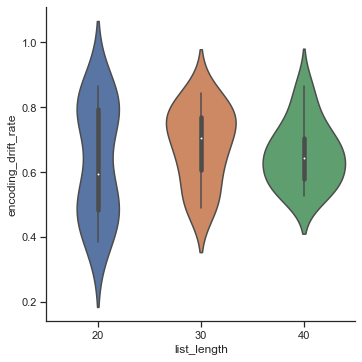

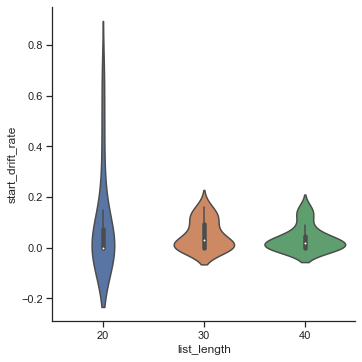

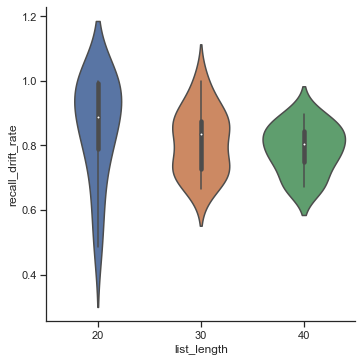

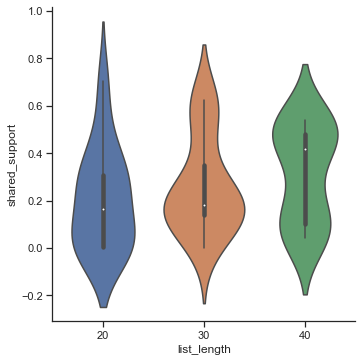

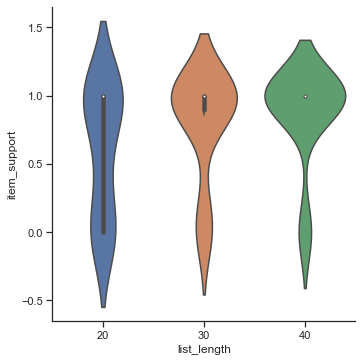

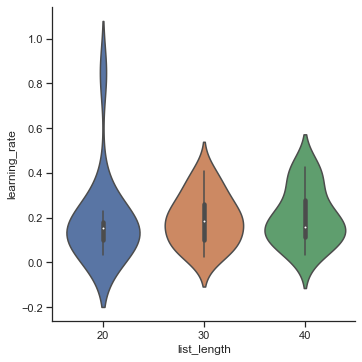

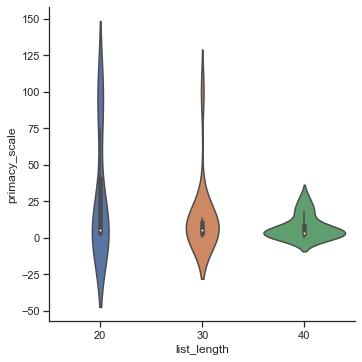

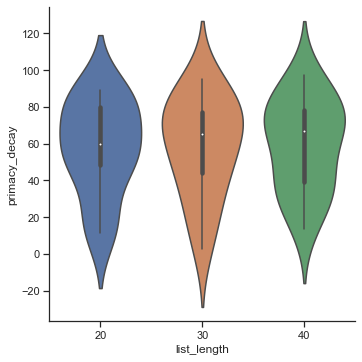

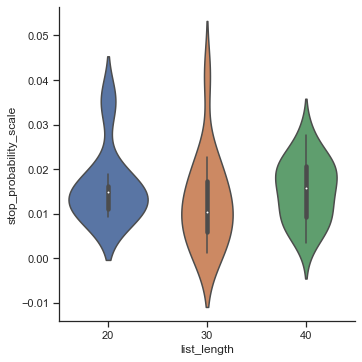

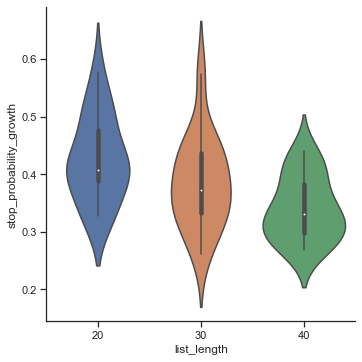

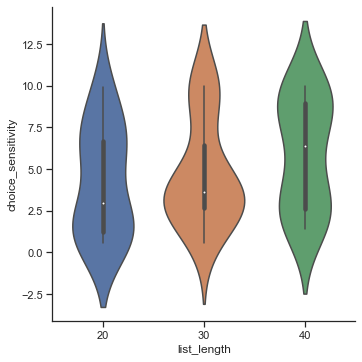

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

for parameter in free_parameters:
    g = sns.catplot(x="list_length", y=parameter, data=param_df, kind='violin')
    plt.show()

Overall parameter distributions seem broadly consistent across list lengths, though we don't apply any statistical tests yet here. There are some parameters whose fitted value distributions seem discrepant between conditions. For example, the choice_sensitivity parameter value distribution ($\tau$) configuring the sensitivity of the recall competition and the shared_support ($\alpha$) parameter setting a baseline level of pre-experimental representational similarity between items are a bit upshifted in the 40 item condition of this dataset. The stop probability growth parameter seems to systematically decrease with list length.

### Group-Level Fits Between Condition

We can also take a step back and look at how model parameters fit across subjects (but still within condition) predict the shape of benchmark recall phenomena like the serial position curve, lag-CRP, and probability of first recall curve. We can simulate the fitted models for 1000 trials each and visualize the central tendency of these phenomena for each model both with and without controlling for list length:

#### Not Controlling for List Length

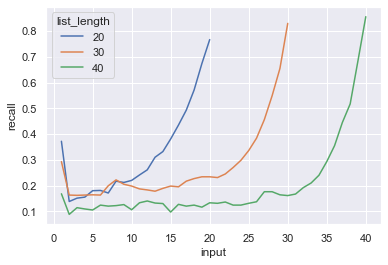

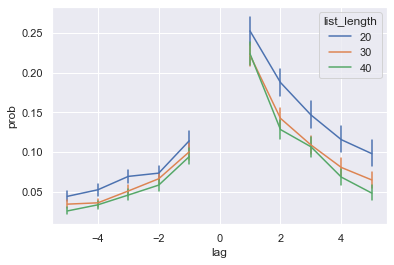

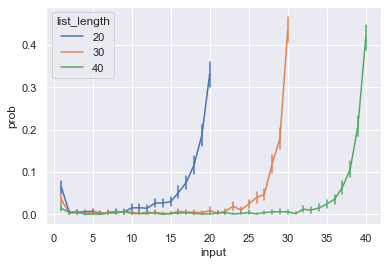

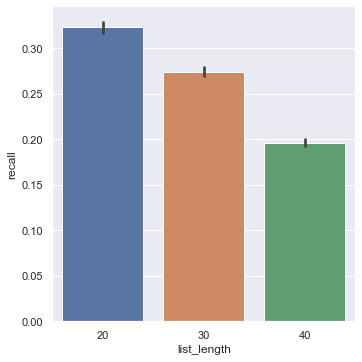

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

sns.lineplot(data=spc, x='input', y='recall', err_style='bars', hue='list_length', legend=True, ci=False)
plt.show()

max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

sns.lineplot(data=lag_crp.query(filt_neg), x='lag', y='prob', 
             err_style='bars', hue='list_length', legend=False)
sns.lineplot(data=lag_crp.query(filt_pos), x='lag', y='prob', 
             err_style='bars', hue='list_length', legend=True)
plt.show()

sns.lineplot(data=pfr, x='input', y='prob', err_style='bars', hue='list_length', legend=True)
plt.show()

sns.catplot(data=spc, x='list_length', y='recall', kind='bar')
plt.show()


#### Controlling for List Length

<AxesSubplot:xlabel='input', ylabel='recall'>

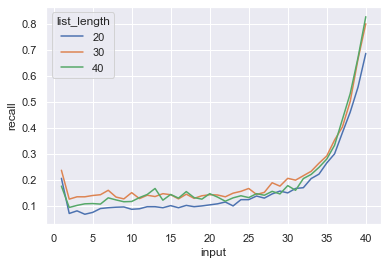

In [27]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(data=spc, x='input', y='recall', err_style='bars', hue='list_length', legend=True, ci=False)

<AxesSubplot:xlabel='lag', ylabel='prob'>

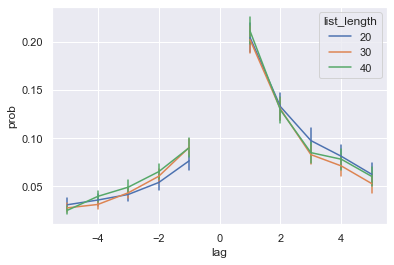

In [28]:
max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

sns.lineplot(data=lag_crp.query(filt_neg), x='lag', y='prob', 
             err_style='bars', hue='list_length', legend=False)
sns.lineplot(data=lag_crp.query(filt_pos), x='lag', y='prob', 
             err_style='bars', hue='list_length', legend=True)


<AxesSubplot:xlabel='input', ylabel='prob'>

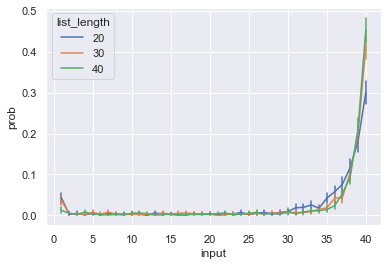

In [29]:
sns.lineplot(data=pfr, x='input', y='prob', err_style='bars', hue='list_length', legend=True)

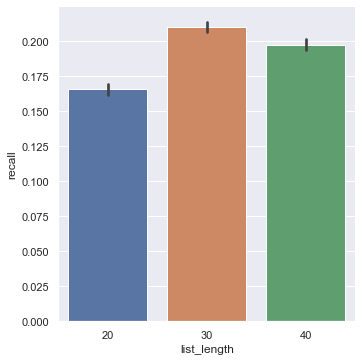

In [30]:
sns.catplot(data=spc, x='list_length', y='recall', kind='bar')

### Discussion

Some discrepancies are interesting, but the broad coherence is probably the most interesting of all. These models are fitted to distinct data matrices collected under distinct research conditions, but corresponding parameter configurations exhibit high apparent generalization across conditions even if the actual behavior they predict between conditions are different.

This approach follows the spirit if not the exact letter of clearer standards for demonstrating model generalizability outlined by Busemeyer and Wang (2000). When you fit CMR to behavior in one condition of the Murdock (1962) dataset, you have a parameter configuration and model that can accurately support a priori predictions of behavior in another.

## The Frontier: CMR and Item Repetitions

Now that we've broadly validated this research approach by recapitulating established research findings, we can try applying to better understand CMR's capacity to account for spacing and repetition effects in free recall. If CMR can be shown to generalize well across *list lengths* with the technique outlined above, can it similarly generalize well across lists containing different patterns of item repetitions?

The dataset from Lohnas & Kahana (2014) offers an opportunity to explore this question. Across 4 sessions, 35 subjects performed delayed free recall of 48 lists. Subjects encountered four different types of lists: 
1. Control lists that contained all once-presented items;  
2. pure massed lists containing all twice-presented items; 
3. pure spaced lists consisting of items presented twice at lags 1-8, where lag is defined as the number of intervening items between a repeated item's presentations; 
4. mixed lists consisting of once presented, massed and spaced items. Within each session, subjects encountered three lists of each of these four types. 

In each list there were 40 presentation positions, such that in the control lists each position was occupied by a unique list item, and in the pure massed and pure spaced lists, 20 unique words were presented twice to occupy the 40 positions. In the mixed lists 28 once-presented and six twice-presented words occupied the 40 positions. In the pure spaced lists, spacings of repeated items were chosen so that each of the lags 1-8 occurred with equal probability. In the mixed lists, massed repetitions (lag=0) and spaced repetitions (lags 1-8) were chosen such that each of the 9 lags of 0-8 were used exactly twice within each session. The order of presentation for the different list types was randomized within each session.

A few factors make comparison of our results from the Murdock (1962) and Lohnas (2014) datasets kind of uncomfortable. In the Murdock (1962) dataset, participants performed immediate rather than delayed free recall, and 15 subjects performed 80 trials (1200 data points) per condition instead of 35 subjects performing 12 trials (420 data points) per condition. So measurements in the former dataset are likely more precise and generalizability comparisons more accurate. Our analyses of particular conditions of the Lohnas (2014) dataset for the InstanceCMR project have already reflected as much: discrepancies between model fits and data are worse even under the control condition excluding any item repetitions in trials. Despite these potential concerns, we can still apply our approach and reflect on any patterns.

### Subject-Level Fitted Parameter Value Distributions Between Conditions

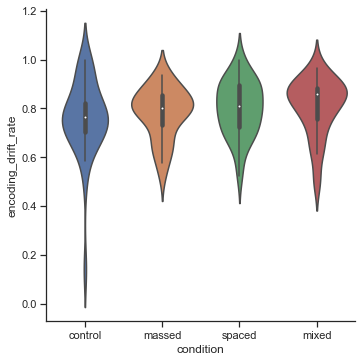

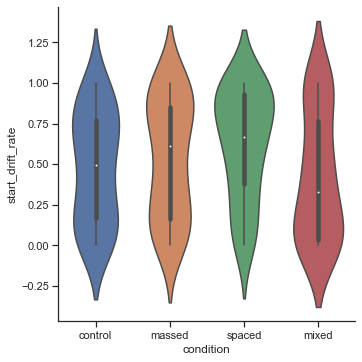

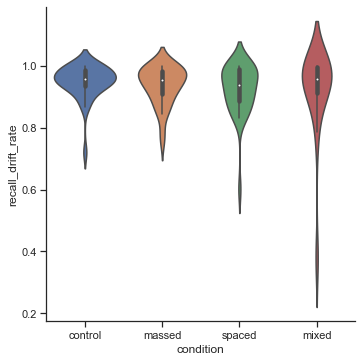

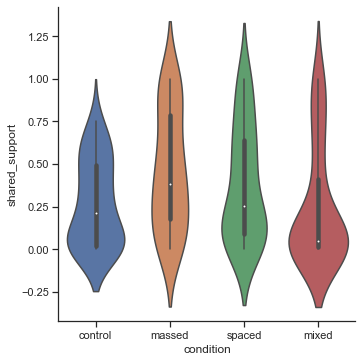

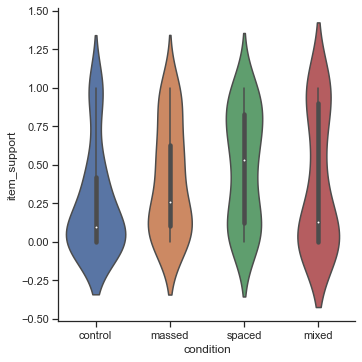

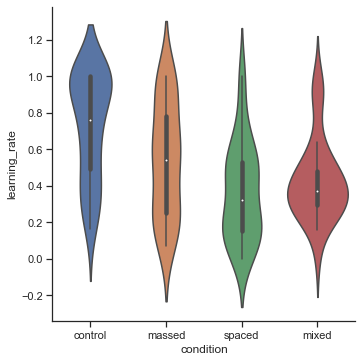

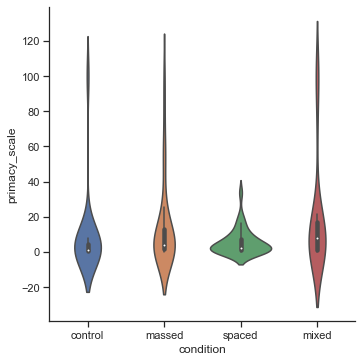

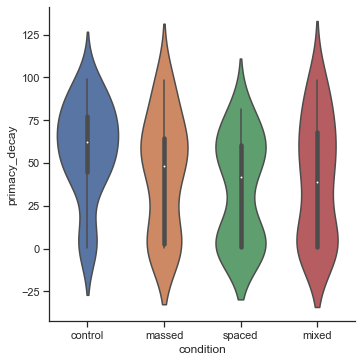

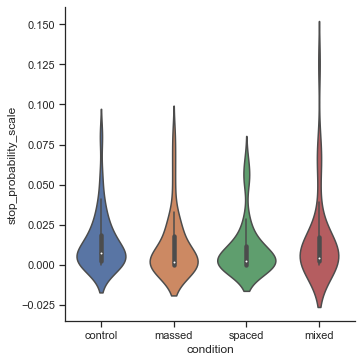

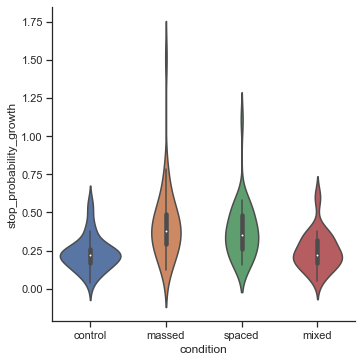

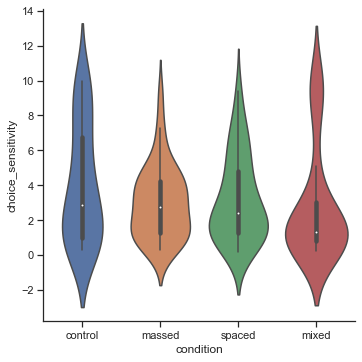

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

param_df = pd.read_csv('../../data/lohnas_2014_individual_cmr_results.csv')

sns.set_theme(style="ticks")

for parameter in free_parameters:
    g = sns.catplot(x="condition", y=parameter, data=param_df, kind='violin')
    plt.show()

Patterns of discrepancies in fitted parameter value distributions between conditions are different what we observed when we applied this analysis to the Murdock (1962) dataset:
- shared_support / $\alpha$ does not differ substantially between conditions like it did with our Murdock (1962) analyses, even though item counts technically differ between some conditions
- item_support / $\delta$, our parameter controlling initial pre-experimental Mcf self-associations, is considerably upshifted in the spaced trial condition compared to other conditions
- learning_rate / $\gamma$, our parameter controlling both initial pre-experimental Mfc self-associations and controls how much Mfc changes with each encoded item, is alternatively especially low spaced condition and super high in the control condition
- Pre-retrieval start_drift_rate / ${\beta}_{start}$ is visibly downshifted in the mixed trial condition compared to other conditions
- primacy decay and stop probability growth parameters also exhibit some discrepancies, but these differences seem smaller and harder to interpret without statistical testing

Because of how gamma is configured in the version of CMR I'm using, high values mean the opposite for Mfc than what high values for the item_support parameter mean for Mcf. So there's actually one consistent pattern here. In trials with spaced out item repetitions, pre-experimental item-to-context and context-to-item associations are weighted more strongly than experimental associations. In other words, learning is slower/less important for later recall in the spaced repetition condition than in the massed repetition condition. This is initially quite counter-intuitive, as the differential encoding hypothesis proposes that learning is weaker for massed than for spaced repetitions. But we leave deeper of these discrepancies in light of the differential encoding hypothesis for another update.

At any rate, we observe a wildly different pattern of fitted parameter value distribution discrepancies when examining conditions of the Lohnas (2014) dataset than when examining conditions of the Murdock (1962) dataset.

### Group-Level Fits Between Condition
What consequences do these differences hold for summary statistics like our recall by serial position, lag-CRP, and probability of first recall analyses? Though inclusion of item repetitions complicates calculation or interpretation of some of these statistics using the actual sequences of item presentations included in the Lohnas (2014) dataset, we can fit CMR across subject to data in each condition and then simulate 1000 trials of performance on a standard 40 item trial with no item repetitions to visualize differences in model predictions about factors like the serial position effect and temporal contiguity.

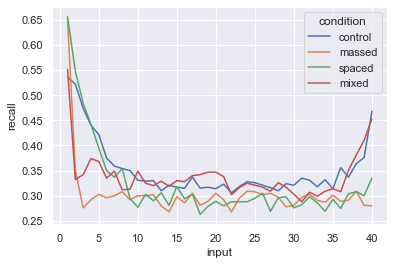

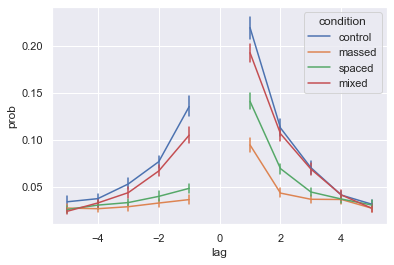

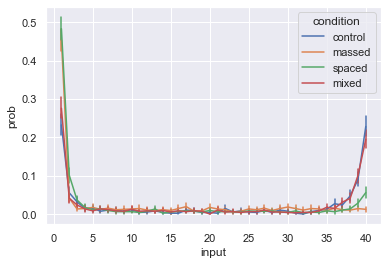

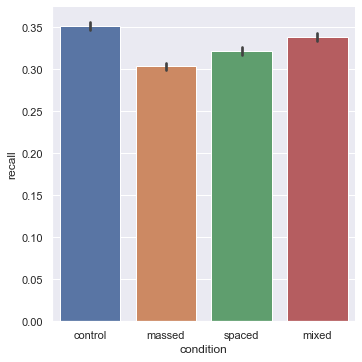

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

sns.lineplot(data=spc, x='input', y='recall', err_style='bars', hue='condition', legend=True, ci=False)
plt.show()

max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

sns.lineplot(data=lag_crp.query(filt_neg), x='lag', y='prob', 
             err_style='bars', hue='condition', legend=False)
sns.lineplot(data=lag_crp.query(filt_pos), x='lag', y='prob', 
             err_style='bars', hue='condition', legend=True)
plt.show()

sns.lineplot(data=pfr, x='input', y='prob', err_style='bars', hue='condition', legend=True)
plt.show()

sns.catplot(data=spc, x='condition', y='recall', kind='bar')
plt.show()


A few systematic discrepancies between model predictions become obvious. 

In our serial position curves, recency effects are eliminated and recall overall is somewhat depressed for the spaced and massed list conditions. At the same time, the primacy effect is substantially stronger.

In our Lag-CRPs, conditions with higher rates of singly-presented items and with greater average spacing between doubly-presented items exhibit higher temporal contiguity. At the same time, the shape of simulated lag-CRP curves seem pretty consistent between conditions.

Our mixed and control conditions seem to pair together in our probability of first recall analysis, too. In those conditions, starting recall with terminal list items occurs roughly as often starting recall with initial list items. In the spaced list and massed list conditions, recall starts much more often with initial list items than terminal list items.

Overall recall rates also differ between condition. This is something we also observe when comparing conditions of the Murdock (1962) dataset with analogous controls: predicted recall rates under the 20-item condition were configured substantially lower than recall rates under 30- and 40-item conditions, even when comparing fitted model performance on same-length trials. In the Lohnas (2014) dataset, the number of unique items also differs by condition, with 40 unique items presented under the control list condition, 20 items under the massed and spaced list conditions, and somewhere between 20 and 40 items in the mixed list condition. But our analyses of the Murdock (1962) dataset didn't identify a monotonic effect of list length on configured recall rates, so explaining these outcomes along those lines doesn't seem very appealing. Furthermore, again, the massed and space recall conditions include the same unique item counts within list. 

To summarize:
- Predicted summary statistics for mixed list and control list conditions are more similiar than different, except for an evident difference in overall item recall rates.
- Pure spaced and massed list conditions exhibit reliably recency and temporal contiguity effects, and weaker recall rates overall, with massed lists associated with the poorest recall and response organization of all.
- Super strong primacy effects for spaced and massed list conditions, though!

### Fitting CMR Across Conditions and Subjects
After seeing the results, we might be curious about how these summary statistics are configured when CMR is fit across all the data from Lohnas & Kahana (2014). The long and short of it seems to be that a "center of tendency" across conditions is arrived at. This suggests that we can we can compare subject-level and across-subject fitted parameter parameters in a similar way, as the latter reflecting a center of tendency across fits from the former.

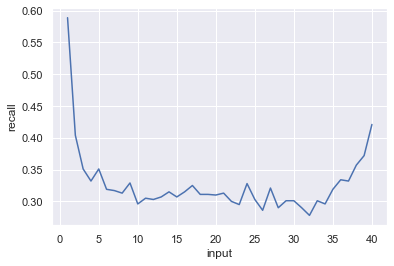

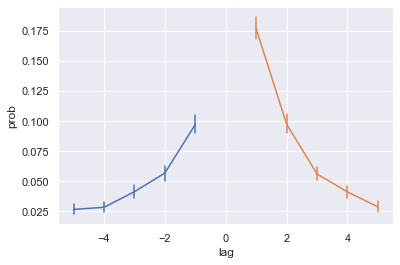

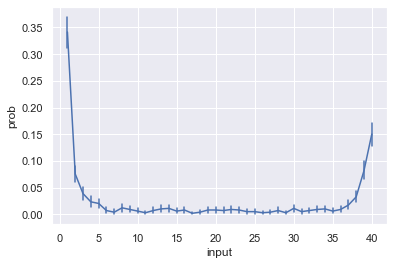

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

model = Classic_CMR(
    **{**{'item_count': list_length, 'presentation_count': list_length, 'sampling_rule': 0},
    **{free_parameters[i]:overall_cmr_result.x[i] for i in range(len(overall_cmr_result.x))}})

sim_df = simulate_data(model, 1000)

spc = fr.spc(sim_df)
lag_crp = fr.lag_crp(sim_df)
pfr = fr.pnr(sim_df)
pfr = pfr.query('output <= 1')

sns.lineplot(data=spc, x='input', y='recall', err_style='bars', legend=True, ci=False)
plt.show()

max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

sns.lineplot(data=lag_crp.query(filt_neg), x='lag', y='prob', 
             err_style='bars',  legend=False)
sns.lineplot(data=lag_crp.query(filt_pos), x='lag', y='prob', 
             err_style='bars',  legend=True)
plt.show()

sns.lineplot(data=pfr, x='input', y='prob', err_style='bars', legend=True)
plt.show()


### Discussion
It's easy enough to chalk these results up to condition-specific spacing/repetition effects or the number of unique items. But our analyses above don't find a similar pattern of effects of item count on fitted parameter values and corresponding predicted summary statistics! And alternatively the big proposition advanced by Lohnas & Kahana's (2014) analysis of CMR in light is that the model can readily account for spacing and repetition effects in free recall without specialized extensions. Instead, we find evidence that CMR's generalizability across conditions of the Lohnas (2014) dataset is limited compared to our findings analyzing its generalizability across list lengths using the Murdock (1962) dataset, with item repetitions and smaller study lists paradoxically configuring models to underpredict temporal contiguity and recall rates in control list conditions.

It's maybe a bit paradoxical at first glance that fitted model parameters from our massed and spaced list conditions might predict lower recall rates for items in control list conditions. After all, doesn't item repetition improve later recall? We can confirm that recall rates for list items are higher overall in the massed and spaced list conditions below.

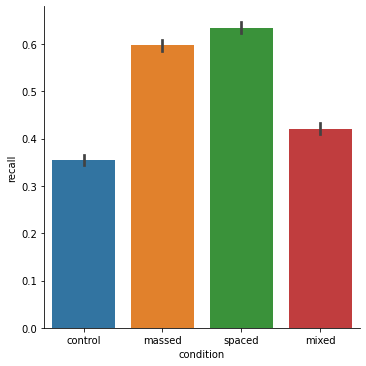

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

dfs = [fr.spc(events.loc[events.condition==i]) for i in [1, 2, 3, 4]]

spc = pd.concat(dfs, keys=['control', 'massed', 'spaced', 'mixed'], names=['condition']).reset_index()

sns.catplot(data=spc, x='condition', y='recall', kind='bar')
plt.show()

And indeed, recall for spaced lists is overall higher than that for massed lists. It seems, though, that the effect of item repetition on recall rates is not so strong that when you fit CMR to datasets in these conditions the fitted parameters do not underpredict recall and other patterns in control list conditions. In other words, for whatever reason, the second presentation of an item simply doesn't have the same effect on later memory for that item as the second in this dataset and the model's inability to fully account for that may be the primary factor driving these observed discrepancies!

## Discussion
Though not completely rigorously demonstrated here, these outcomes asre the most compelling evidence I've found yet that despite some previous research concluding otherwise, CMR as specified is limited in its capacity to account for spacing and repetition effects in free recall. Parameters derived from fitting the model to control lists that exclude item repetitions fail to generalize well to performance in lists with item repetitions, and this failure manifests along pretty systematic patterns. My best guess given these results is that the limited, nonlinear effect of item repetition on later recall is simply something model structures in CMR are not designed to account for, despite its capacity to predict repetition effects a priori (demonstrated by Lohnas & Kahana, 2014).

### Justification for CMR-DE?
I've come into this hoping to justify developing something I've been calling CMR-DE, based on inspiration from MINERVA-DE. 

The big idea of the deficient encoding hypothesis as an account of the spacing effect is that:
1. Item familiarity ("close acquaintance") impairs attention and memory of subsequent encoding.
2. Repeated experience of an item increases familiarity with that item
3. On the other hand, familiarity decreases with intervening experience, allowing better memory of repetitions
    
The MINERVA-DE model (Collins et al, 2020) implements a model with these mechanisms to account for various effects in recognition memory. In the model, a short-term memory store called primary memory is maintained with a long-term secondary memory. When a word is attended, its familiarity is computed relative to the items in primary memory. The more familiar a studied item is to existing items in primary memory, the less well it is encoded in secondary memory. This process is called discrepancy encoding, because encoding is strongest for items that are discrepant with information already stored in primary memory.

I was interested in motivating a similar mechanism within the framework of retrieved context theory. The version of CMR we've been using lately (specified in Morton and Polyn, 2016) already has an attention process mediating learning rates; Sederberg (2008) proposes one to enforce the primacy effect, scaling the amount of learning based on the serial position of the studied item according to:

$$
\Delta M^{CF}_{exp} = \phi_i f_i c^{'}_i
$$

I've been weighing adding another mechanism that similarly scales the amount of learning based on the "familiarity" of the encoded item, calculated on the basis of (cosine) similarity to the current state of $C$. A familiarity_scale parameter $\zeta_s$ would control the amount of this scaling, similar to $\phi_s$:

$$
\zeta_i = (1 - S(f_i, c_i))^{\zeta_s}
$$

Configured this way, when $\zeta_s$ is 0, the effect of familiarity on learning will be nil, but as it grows, that effect will increase. We could instead apply this parameter to scale learning in Mfc, but this would have wider-ranging consequences for the course of encoding as well as retrieval, so I'd be loathe to.

The best case for adding this mechanism to CMR is that it would account for the depressed effect of item repetition on free recall using a mechanism with a long tradition of consideration in the research literature. It would potentially improve CMR's generalizability not just between our control list and alternative conditions, but also between our mixed, massed, and spaced list conditions, and potentially others not explored in the Lohnas (2014) dataset.

### Caveat: Limited Evidence Yet of Failure to Account for Spacing Effect
...But right now, we don't necessarily have evidence that a mechanism like this is necessary to improve CMR's generalizability! At best, what we have is evidence that repeated presentation of an item shouldn't have the same effect on memory as the first presentation, even accounting for the mediating role of contextual representational dynamics in retrieval processes. To put it more simply, right here we have evidence that CMR misrepresents the effect of repetition on item recall, but not that it can't account for the item _spacing_ effect with its existing mechanisms.

CMR already predicts some spacing effect. Though in other analyses I've identified some discrepancies in its predictions after model fitting, it could be the case that addressing the issues with CMR identified above would address these discrepancies, too. With that considered, it may be wise to also consider a more conservative modification to CMR that modulates learning based on a more binary conceptualization of familiarity: if an item has been seen before at all, weaken its effect on learning by some parametrized amount.

This would still effectively be an implementation of differential encoding into CMR, but it makes distinct predictions about the difference between massed and spaced item repetition on memory. Perhaps more critically, it makes different predictions about the effect of item similarity (either directly or in terms of contextual associations) on memory encoding. Some existing evidence already fails to find a spacing effect for semantically similar items (Nakata & Suzuki, 2019), and that would be a natural a priori prediction to make about a variant of CMR with similarity-based differential encoding mechanisms.

### Next Steps
CMR-DE is implemented. In fact, I built it into my CMR implementation just like how I've added a switch to CMR that controls whether it applies the power or exponential item sampling rule. This means we already have the infrastructure to fit and apply all our existing analyses to the extended model. Adding a switch that instead applies a simplified modulatory mechanism would also be trivial (two lines of code, because python doesn't allow one line conditional control structures).

Since the parameter would only affect behavior in lists with item repetitions, we'd look for one-way generalizability from spaced, massed, and mixed list conditions to control list conditions. We'd approach the matter more formally rather than visualizing parameter value distributions. We'd fit the model variants to conditions 2-4, and then evaluate log-likelihood of data in condition one using these parameters. Even though CMR-DE would be more complex, this would nonetheless be an a priori comparison sidestepping some of the advantage of complex models in post-hoc comparisons. Finally, we'd also visualize predicted summary statistics under control list conditions using these fitted parameters, and characterize discrepancies.

I think that the results of that comparison, plus a more fleshed out version of everything in this document, would be both rigorous and enough for a paper.